In [58]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [37]:
dt = pd.read_csv("U4_04_train.csv")
dt.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<Axes: xlabel='Survived', ylabel='count'>

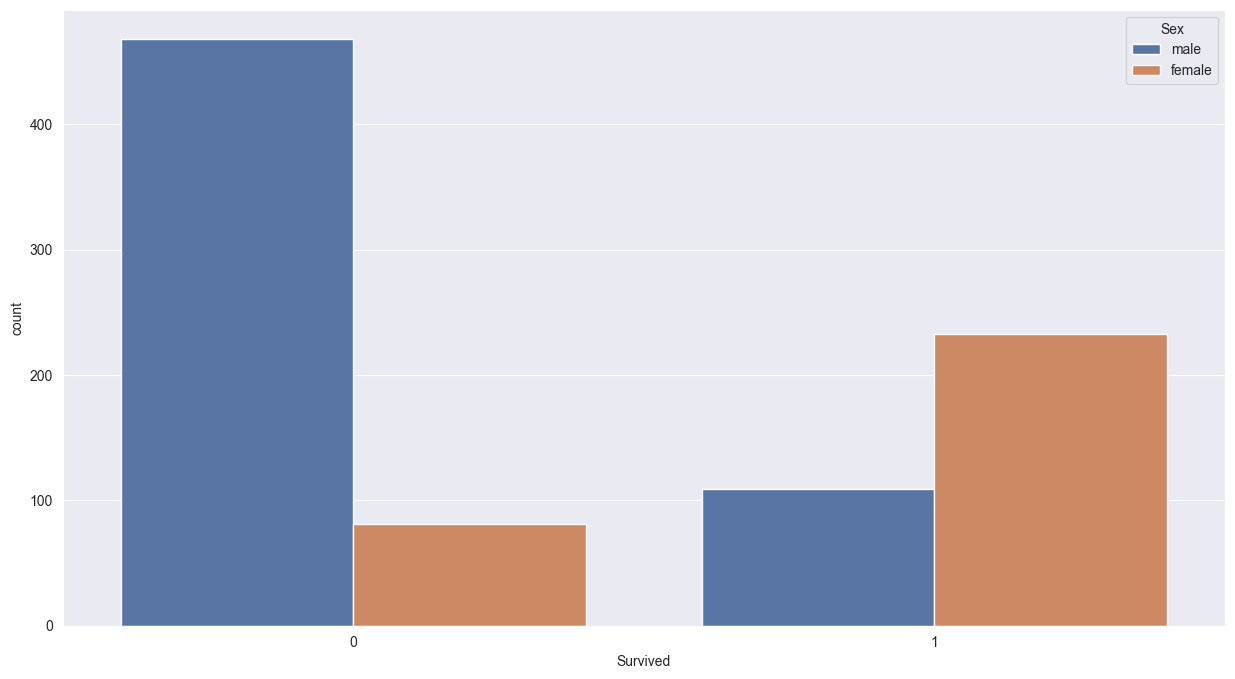

In [38]:
sb.countplot(x = "Survived" , data = dt, hue = "Sex")

In [39]:
dt.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

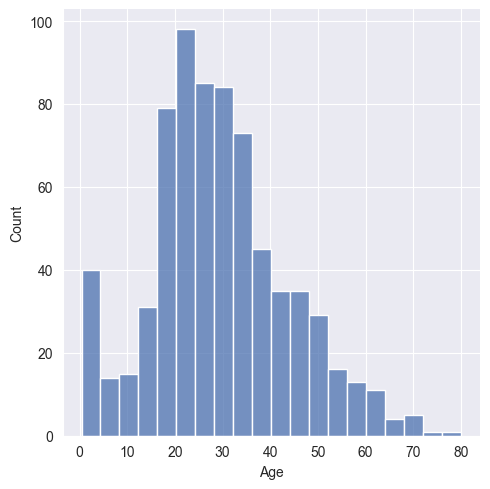

In [40]:
sb.displot( x = "Age" , data = dt)

In [41]:
dt["Age"] = dt["Age"].fillna(dt["Age"].mean())
dt["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [42]:
dt_drop = dt.drop(["Cabin"], axis = 1)
dt_drop

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [43]:
dt_drop = dt_drop.dropna() # este nda mas se hizo para votar los datos de embarked no el resto
dt_drop.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [44]:
dt_drop = dt_drop.drop(["Name", "PassengerId", "Ticket"], axis = 1)


In [45]:
dt_drop = dt_drop.join(pd.get_dummies(dt_drop["Sex"], dtype = int, drop_first = True))

In [46]:
dt_drop = dt_drop.drop("Sex", axis = 1)
dt_drop

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.000000,1,0,7.2500,S,1
1,1,1,38.000000,1,0,71.2833,C,0
2,1,3,26.000000,0,0,7.9250,S,0
3,1,1,35.000000,1,0,53.1000,S,0
4,0,3,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,S,1
887,1,1,19.000000,0,0,30.0000,S,0
888,0,3,29.699118,1,2,23.4500,S,0
889,1,1,26.000000,0,0,30.0000,C,1


<Axes: xlabel='Survived', ylabel='count'>

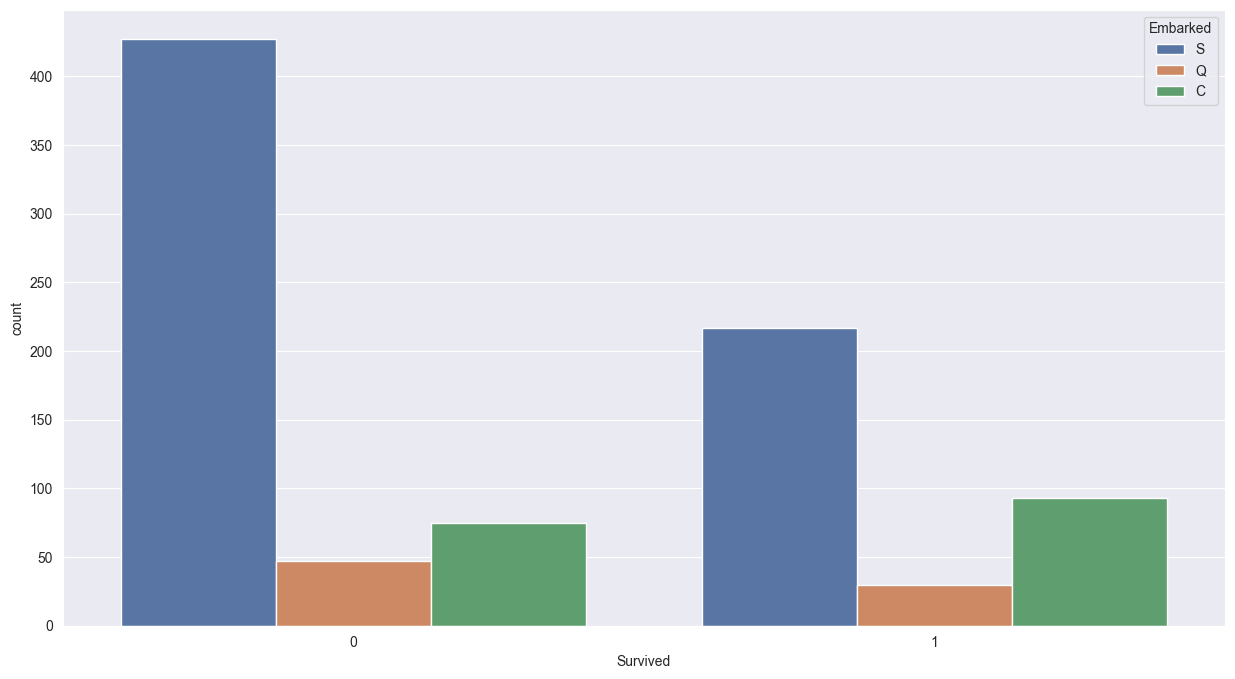

In [47]:
sb.countplot(x = "Survived", data = dt_drop, hue = "Embarked")

In [48]:
dt_drop = dt_drop.join(pd.get_dummies(dt_drop["Embarked"], dtype = int, drop_first = True))

In [49]:
dt_drop = dt_drop.drop(["Embarked"], axis = 1)
dt_drop

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


<Axes: >

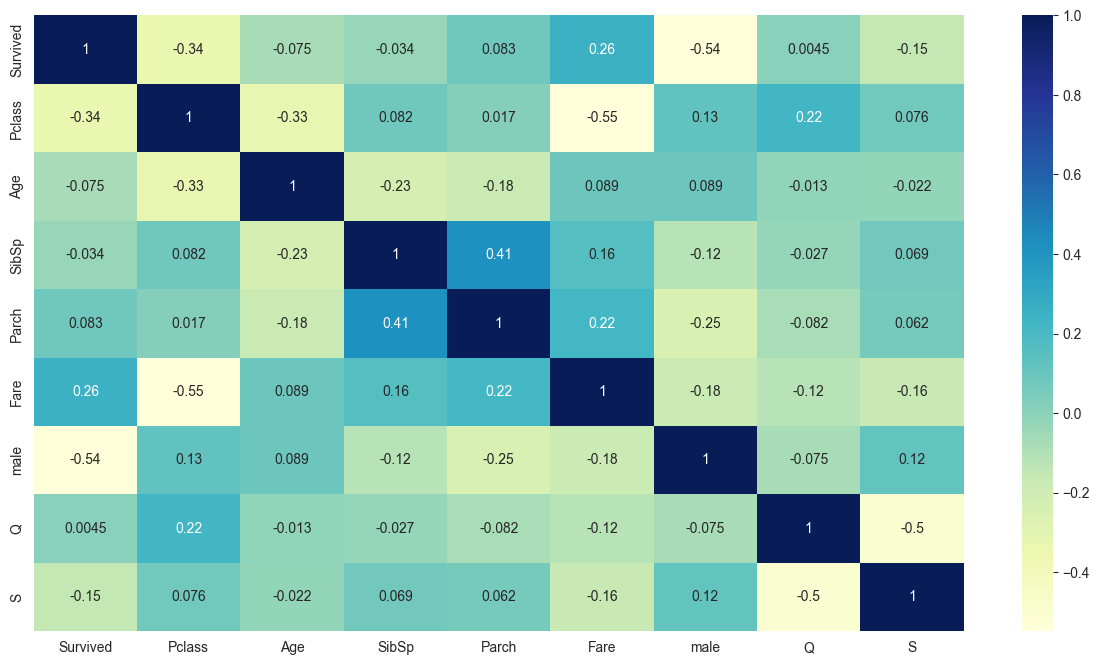

In [50]:
sb.set({"figure.figsize": (15,8)})
sb.heatmap(dt_drop.corr(), annot = True, cmap = "YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

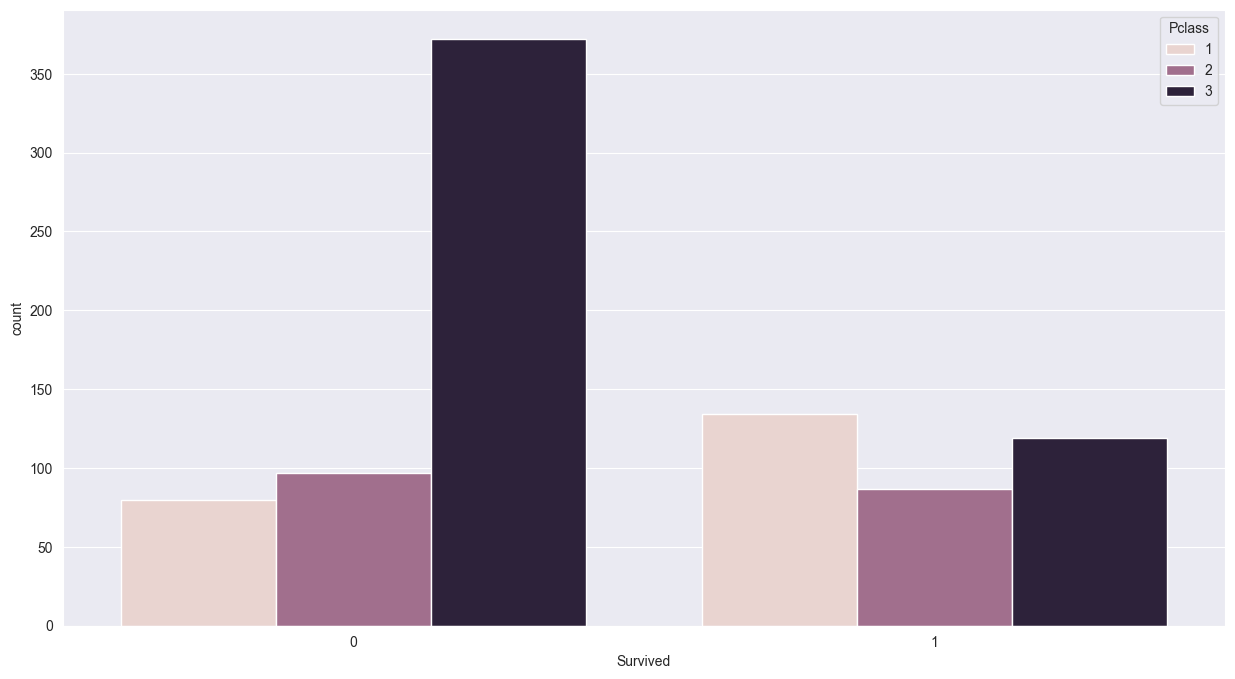

In [51]:
sb.countplot(x = "Survived", data= dt_drop , hue = "Pclass")

In [52]:
Caract = dt_drop.drop(["Survived"], axis = 1)
eti = dt_drop["Survived"]

In [53]:
caract_ent, caract_prue, eti_ent, eti_prue = train_test_split(Caract, eti, test_size = 0.7)

In [54]:
model = LogisticRegression(max_iter = 1000)
model.fit(caract_ent, eti_ent)

LogisticRegression(max_iter=1000)

In [55]:
predict = model.predict(caract_prue)
prediction = {"Prediccion ": predict, "Valor esperado": eti_prue}
prediction = pd.DataFrame(prediction)
prediction

,Prediccion,Valor esperado
747,1,1
156,1,1
250,0,0
690,0,1
126,0,0
...,...,...
587,0,1
254,0,0
736,0,0
779,1,1


In [56]:
error = accuracy_score(eti_prue, predict)
print(f"El porcentaje de exito de nuestro modelo es del {error*100}%")

El porcentaje de exito de nuestro modelo es del 80.09630818619583%


In [57]:
print(classification_report(eti_prue, predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       374
           1       0.80      0.66      0.73       249

    accuracy                           0.80       623
   macro avg       0.80      0.78      0.79       623
weighted avg       0.80      0.80      0.80       623



In [62]:
pd.DataFrame(confusion_matrix(eti_prue, predict), columns= ["Pred: No", "Pred: Si"], index =["Real : No", "Real: Si"])

,Pred: No,Pred: Si
Real : No,334,40
Real: Si,84,165


In [81]:
new_person = np.array([3, 20, 0, 0, 10, 1, 0, 0]).reshape(1,-1)
new_person = pd.DataFrame(new_person, columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'])

if model.predict(new_person)[0] == 1:
    print("OH my gog you could survived !!!!!")
else:
    print("Oh dear, sorry bro, btu you couldn't survived, this life is a peace of shit")

Oh dear, sorry bro, btu you couldn't survived, this life is a peace of shit
